In [5]:
import numpy as np

arr = np.arange(15).reshape((3,5))
print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


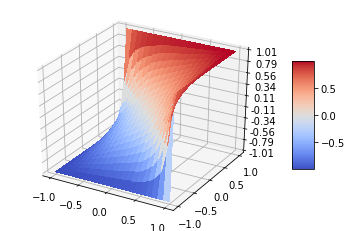

In [38]:
import math
import numpy as np

def ec(x, y):
    if x > 0 and y > 0:
        return x + y - (x * y)
    elif x < 0 and y < 0:
        return x + y + (x * y)
    elif (x * y) < 0:
        return (x + y) / (1 - min(abs(x), abs(y)))
    return 0
    
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()
ax = fig.gca(projection='3d')

# Grab some test data.
X = np.arange(-1, 1.05, 0.1)
Y = np.arange(-1, 1.05, 0.1)
Zec = np.vectorize(ec)
Z = Zec(X[:, np.newaxis], Y)

# Plot a basic wireframe.
surf = ax.plot_surface(X[:, np.newaxis], Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


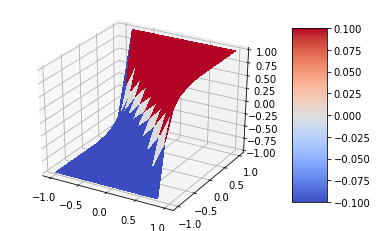

In [32]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
def evid_comb(X, Y):
  cf_ = np.zeros(X.shape)
  for r in range(X.shape[0]):  
    for c in range(X.shape[1]):
      x, y = X[r, c], Y[r, c]
      if x < 0 and y < 0: # both neg
        cf_[r,c] = round(x + y + x*y,4)
      elif x > 0 and y > 0: # both pos
        cf_[r,c] = round(x + y - x*y, 4)
      else: # both diff
        cf_[r, c] = round((x + y) / (1 - min(abs(x), abs(y))), 4)
  return cf_
    

min_ = -1
max_ = 1
X = [round(i, 2) for i in np.arange(-1, 1.2, 0.2)]
Y = [round(i, 2) for i in np.arange(-1, 1.2, 0.2)]
X_, Y_ = np.meshgrid(X, Y)
cf_ = evid_comb(X_, Y_)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X=X_, Y=Y_, Z=cf_, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.8, aspect=5)
plt.show()


In [2]:
import numpy as np

numbers = np.random.uniform(size=30)
numbers

array([0.46216252, 0.67570345, 0.18054338, 0.23348482, 0.78451388,
       0.24281643, 0.60468315, 0.51673844, 0.62480759, 0.99926455,
       0.02484968, 0.22443738, 0.25487125, 0.53731001, 0.72125143,
       0.60517538, 0.17684747, 0.39859058, 0.85478222, 0.68344484,
       0.00130833, 0.29541566, 0.97003792, 0.84056963, 0.94058386,
       0.11125099, 0.70996729, 0.79006248, 0.05183902, 0.05148308])

In [7]:
mean = np.mean(numbers)
mean

0.4856265564707313

In [8]:
std = np.std(numbers)
std

0.30674315523734336

In [14]:
for i in range(1, 4):
    print("Actual", len(numbers[(numbers < mean + i * std) & (numbers > mean - i * std)]) / len(numbers))
    print("Tchebshev", 1 - 1 / i ** 2)

Actual 0.6333333333333333
Tchebshev 0.0
Actual 1.0
Tchebshev 0.75
Actual 1.0
Tchebshev 0.8888888888888888
